# Introduction: Animation Correlations

To calculate the correlations between Michael's animation videos and the video only videos, we must do three steps: 
1. Clean the datasets to remove participants who didn't perform as desired.
2. Average columnwise to get the average ratings of a specific animation/video in a vector form.
3. Calculate the correlation between the video_only condition and {mouth_only, eyes_only, and full_face} animation conditions.

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import re
from cleanavgcorr import ParticipantResults
import scipy.stats as st
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #1
	"backend=TkAgg"
	in file "/Users/MichaelSmith/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


# Read in CSV Files

We read in CSV's to four lists: face, eyes, mouth, and vid_only. Each list contains twelve tuples, corresponding to the twelve videos that we tested participants on. Each tuple is of format (video_id, class ParticipantResults). 

*For anim_directory*: give the path to the 'val_ratings_result' folder in the 'animation_results' folder.

*For vid_only_dir*: give the path to the 'videoOnly results' 

*For worker_info*: give the path to the worker_info.csv file

In [2]:
anim_directory = os.fsencode('/Users/MichaelSmith/Desktop/new_animation_result/ratings')
vid_only_dir = os.fsencode('/Users/MichaelSmith/Desktop/VideoOnly')
worker_info = pd.read_csv('/Users/MichaelSmith/Desktop/new_animation_result/workers/worker_info_new.csv', sep=',')

face = {}
mouth = {}
eyes = {}
vid_only = {}

# FACE, EYES, MOUTH ANIMATION CONDITIONS
for file in os.listdir(anim_directory):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(anim_directory), filename))
        if 'face' in filename:
            pr = ParticipantResults(vid_id + '_anim_face', df, worker_info)
            face[vid_id] = pr
        elif 'eyes' in filename:
            pr = ParticipantResults(vid_id + '_anim_eyes', df, worker_info)
            eyes[vid_id] = pr
        else:
            pr = ParticipantResults(vid_id + '_anim_mouth', df, worker_info)
            mouth[vid_id] = pr

# VIDEO ONLY CONDITION
for file in os.listdir(vid_only_dir):
    filename = os.fsdecode(file)
    if filename.endswith('.csv'):
        vid_id = filename[:10]
        df = pd.read_csv(os.path.join(os.fsdecode(vid_only_dir), filename))
        pr = ParticipantResults(vid_id, df, worker_info)
        vid_only[vid_id] = pr

In [3]:
face['ID118_vid3']

# Cleaning and Averaging
First, we need to clean the CSV files before we can average the participants' ratings. The type of cleaning depends on
the CSV. 

##### Removal Conditions:
For the animation CSVs (only), we have information on the attention of the participants (time spent on the tab = i.e. 1 - time on other tab(s)); if attention falls below 75% **(subject to change)**, we remove that participant's trial results. For both the video-only and animation conditions, we remove a participant's trial if they do not move the slider bar at least three times **(subject to change)**. These variables can be changed in the ParticipantResults class.

This leaves us with datasets of size (num_participants x time).
##### Averaging:
We average each dataset columnwise, across participants.

In [4]:
# We can call clean as many times as possible - but cleaning only works once. Same with averaging.
for key in vid_only:
    face[key].clean()
    face[key].compute_average()
    eyes[key].clean()
    eyes[key].compute_average()
    mouth[key].clean()
    mouth[key].compute_average()
    vid_only[key].clean(anim=False)
    vid_only[key].compute_average()
    print()

Num people thrown out for video ID173_vid6_anim_face: 4 out of 37 participants
Num people thrown out for video ID173_vid6_anim_eyes: 2 out of 26 participants
Num people thrown out for video ID173_vid6_anim_mouth: 3 out of 27 participants
Num people thrown out for video ID173_vid6: 9 out of 59 participants

Num people thrown out for video ID120_vid1_anim_face: 6 out of 35 participants
Num people thrown out for video ID120_vid1_anim_eyes: 2 out of 23 participants
Num people thrown out for video ID120_vid1_anim_mouth: 6 out of 32 participants
Num people thrown out for video ID120_vid1: 5 out of 64 participants

Num people thrown out for video ID174_vid2_anim_face: 5 out of 34 participants
Num people thrown out for video ID174_vid2_anim_eyes: 4 out of 24 participants
Num people thrown out for video ID174_vid2_anim_mouth: 4 out of 32 participants
Num people thrown out for video ID174_vid2: 10 out of 69 participants

Num people thrown out for video ID151_vid2_anim_face: 9 out of 30 participa

# Correlating

For each of the three conditions ({eyes_only, jaw/mouth_only, full_face}), we correlate with the video_only condition for each video before averaging across all videos. We use pearson's r for correlating.

24

In [14]:
total_face = []
face_pear_corr_vals = []
total_mouth = []
mouth_pear_corr_vals = []
total_eyes = []
eyes_pear_corr_vals = []

for key in vid_only:
    face_corr = face[key].average_df.corr(vid_only[key].average_df)
    total_face.append(np.arctanh(face_corr))
    face_pear_corr_vals.append(face_corr)
    mouth_corr = mouth[key].average_df.corr(vid_only[key].average_df)
    total_mouth.append(np.arctanh(mouth_corr))
    mouth_pear_corr_vals.append(mouth_corr)
    eyes_corr = eyes[key].average_df.corr(vid_only[key].average_df)
    total_eyes.append(np.arctanh(eyes_corr))
    eyes_pear_corr_vals.append(eyes_corr)
    print('For video %s: corr\'s btwn video_only and face, mouth, and eyes are: %5f, %5f, %5f' % (key, face_corr, mouth_corr, eyes_corr))
    
print('Average Face Correlation: ', np.tanh(np.sum(total_face)/24))
print('Average Mouth Correlation: ', np.tanh(np.sum(total_mouth)/24))
print('Average Eyes Correlation: ', np.tanh(np.sum(total_eyes)/24))


    

For video ID173_vid6: corr's btwn video_only and face, mouth, and eyes are: 0.758982, -0.125961, 0.005120
For video ID120_vid1: corr's btwn video_only and face, mouth, and eyes are: 0.820400, 0.231546, -0.164377
For video ID174_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.548788, 0.342210, -0.505821
For video ID151_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.487768, 0.904871, 0.624628
For video ID135_vid3: corr's btwn video_only and face, mouth, and eyes are: -0.264098, 0.554585, 0.690425
For video ID161_vid3: corr's btwn video_only and face, mouth, and eyes are: 0.866053, 0.683447, 0.335927
For video ID169_vid4: corr's btwn video_only and face, mouth, and eyes are: 0.658679, -0.056467, 0.811073
For video ID181_vid2: corr's btwn video_only and face, mouth, and eyes are: 0.878202, 0.867823, 0.485170
For video ID147_vid5: corr's btwn video_only and face, mouth, and eyes are: -0.193039, 0.391303, -0.073037
For video ID167_vid2: corr's btwn video_only and

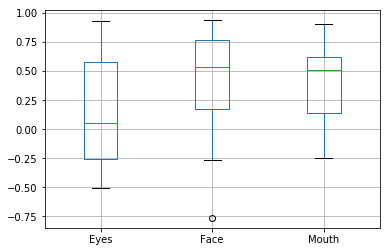

In [9]:
pd.DataFrame({'Face':face_pear_corr_vals, 'Mouth':mouth_pear_corr_vals, 'Eyes':eyes_pear_corr_vals}).boxplot(column=['Eyes', 'Face', 'Mouth'])